In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
crash = pd.read_csv('full_data_for_models.csv')
crash.head()

,Crash Date/Time,Speed Limit,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target,Vehicle Age
0,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,7
1,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,22
2,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,8
3,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,5
4,2015-01-01 01:14:00,40,1,1,3,1,1,0,0,10.48,2,2,13


In [2]:
X = crash.drop(['Injury_Target', 'Crash Date/Time'], axis=1)
y = crash['Injury_Target']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=2, step=1) 

In [5]:
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=2)

In [6]:
from sklearn.metrics import accuracy_score

# Transform the training and testing data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the model with the selected features
model.fit(X_train_rfe, y_train)

# Make predictions
y_pred = model.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy with Selected Features: ", accuracy)

Model Accuracy with Selected Features:  0.7719437558103501


# Extract Features

In [7]:
selected_features = X_train.columns[rfe.support_]
selected_features_list = selected_features.tolist()
print("Selected Features List: ", selected_features_list)

Selected Features List:  ['Distance', 'Vehicle Age']


# Create New Dataframe Subset

In [8]:
crash_data2 = crash[['Injury_Target', 'Distance', 'Vehicle Age']]
crash_data2.head()

,Injury_Target,Distance,Vehicle Age
0,0,14.88,7
1,0,14.88,22
2,0,1.64,8
3,0,1.64,5
4,2,10.48,13


In [9]:
X = crash_data2.drop('Injury_Target', axis=1)
y = crash_data2['Injury_Target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88     28214
           1       0.11      0.04      0.06      3553
           2       0.09      0.03      0.04      2364
           3       0.01      0.00      0.01       254
           4       0.00      0.00      0.00        36

    accuracy                           0.78     34421
   macro avg       0.21      0.20      0.20     34421
weighted avg       0.69      0.78      0.73     34421

Confusion Matrix:
[[26645   918   580    66     5]
 [ 3350   130    68     4     1]
 [ 2226    73    62     3     0]
 [  241     8     4     1     0]
 [   32     2     1     1     0]]


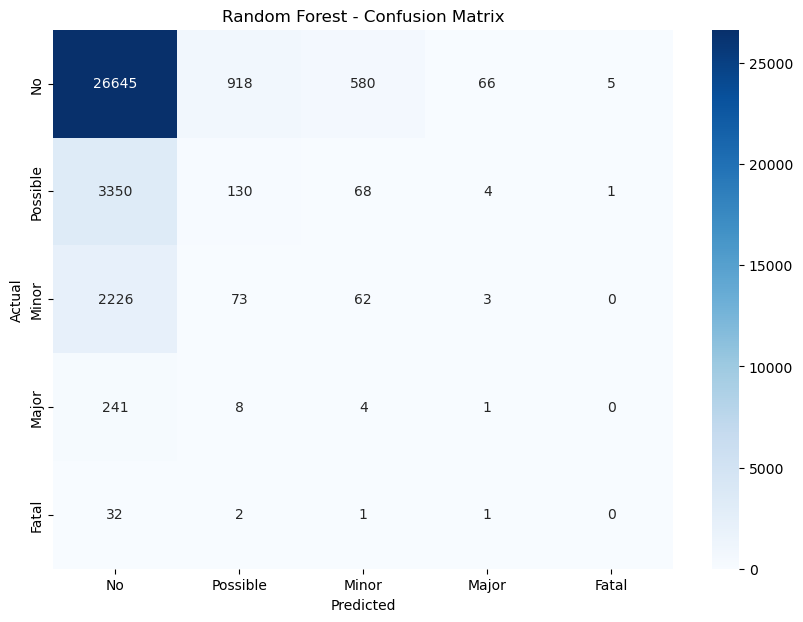

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Possible', 'Minor', 'Major', 'Fatal'], yticklabels=['No', 'Possible', 'Minor', 'Major', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()